In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv', encoding = 'windows-1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Условие 1: Задача 1 #
### Изучите стоимости недвижимости ###

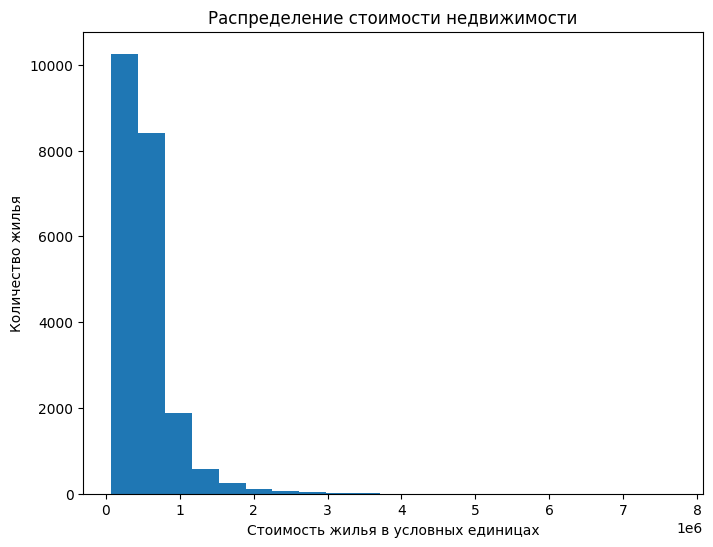

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins= 21)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость жилья в условных единицах')
plt.ylabel('Количество жилья');

#### Видим, что стоимость жилья распределена крайне неравномерно: большая часть недвижимости является относительно недорогой, в то время как остальная небольшая часть недвижимости распределена в большом диапозоне стоимости, скорее всего эта небольшая часть недвижимости будет отнесена к выбросам при стат анализе. ####

### Изучите распределение квадратуры жилой ###

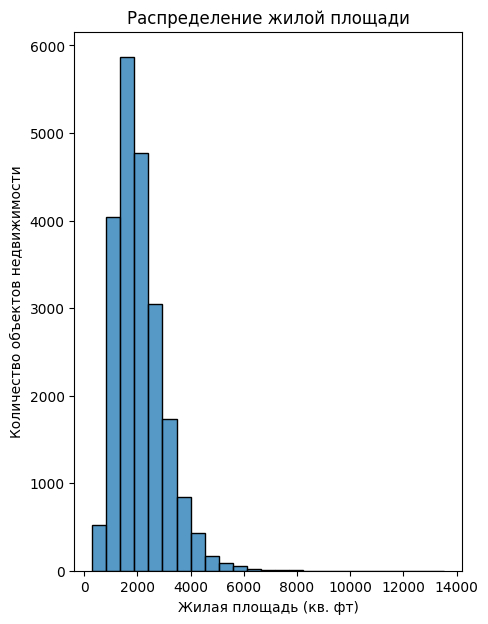

In [8]:
plt.figure(figsize=(5, 7))
sns.histplot(df['sqft_living'], bins=25)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь (кв. фт)')
plt.ylabel('Количество объектов недвижимости');

#### Наблюдаем аналогичную картину: малая часть недвижимости имеет большой метраж, из-за чего график как бы вытягивается вправо, но при этом в данном случае распределение больше похоже на нормальное ####

### Изучите распределение года постройки ###

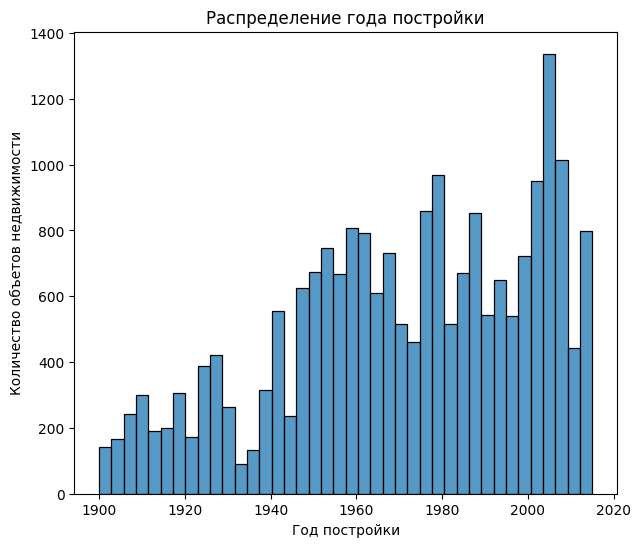

In [11]:
plt.figure(figsize=(7, 6))
sns.histplot(df['yr_built'], bins=40)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объетов недвижимости');

#### Хотя мы наблюдаем на гистограмме "провалы" и "пики", прослеживается ожидаемый тренд увеличения количества объектов с течением времени, связанный с увеличивающейся экономикой и потребностью в новых объектах, а также с ветшанием объектов старого жилого фонда ####

### Изучите распределение домов от наличия вида на набережную ###

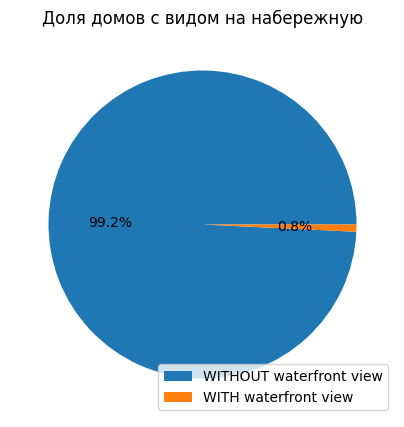

In [16]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['WITHOUT waterfront view', 'WITH waterfront view'])
plt.title('Доля домов с видом на набережную');

#### Четко видим, что количество домов с видом на набережную составляет менеее одного процента от общего количества недвижимости ####

### Изучите распределение этажей домов ###

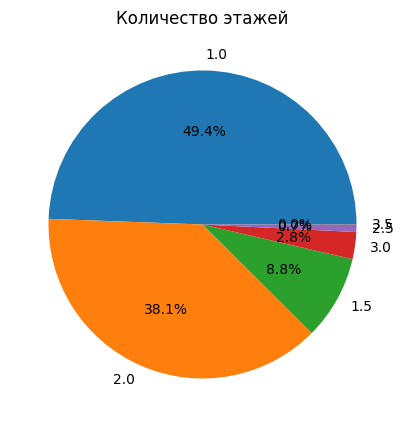

In [19]:
data = df['floors'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

#### Видим, что распределение этажности во многом похоже на распределение стоимости и метража: большая часть домов являются одноэтажными или двухэтажными, а более двух этажей имеет совсем небольшое число объектов недвижимости ####

### Изучите распределение состояния домов ###

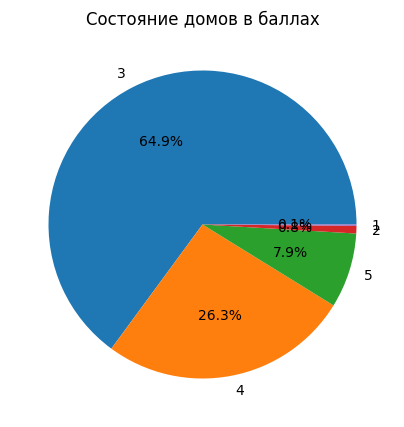

In [20]:
data = df['condition'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Состояние домов в баллах');

#### В данном случае делаем вывод о том, что основная часть домов в нормальном или хорошем состоянии, почти восемь процентов - в отличном, тогда как домов в плохом или ужасном состоянии всего чуть больше одного процента ####

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями ###

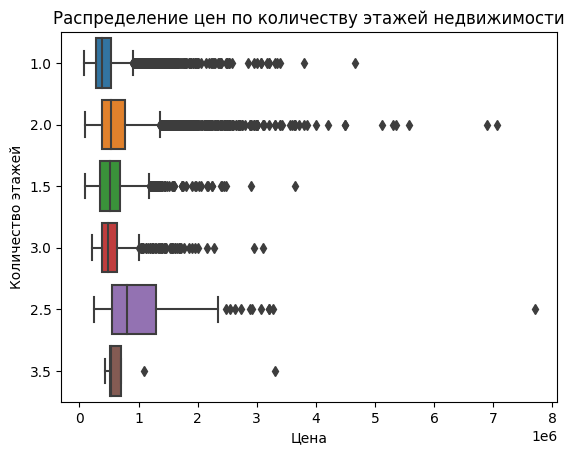

In [22]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'));
plt.xlabel('Цена в условных единицах')
plt.ylabel('Количество этажей')
plt.title('Распределение цен по количеству этажей недвижимости');

#### График распределения цен по этажам позволяет сделать вывод о том, что этажность почти не влияет на стоимость недвижимости, пятидесятый квартиль во всех распределениях едва меняется и не зависит от этажности, в то же время для всех распределений свойственно большое количество выбросов, то есть, например среди двухэтажных и одноэтажных объектов есть много домов, цена на которые намного выше средней цены на трехэтажные дома ####

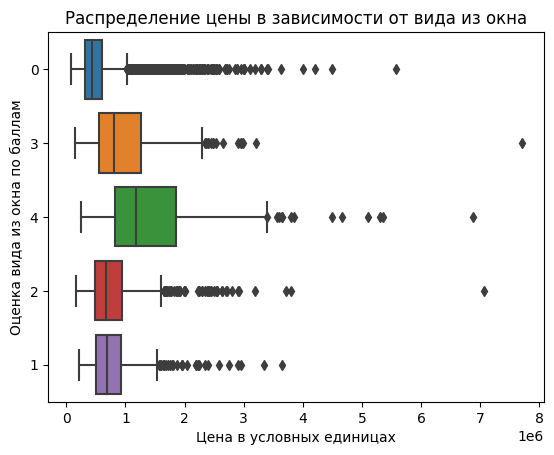

In [23]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'));
plt.xlabel('Цена в условных единицах')
plt.ylabel('Оценка вида из окна по баллам')
plt.title('Распределение цены в зависимости от вида из окна');

#### Как мы можем видеть, вид из окон домов прямо влияет на стоимость недвижимости - чем выше оценка вида из окна, тем выше стоимость, исключение составляют разве что дома с оценкой 1 и 2, поскольку их распределение не дает однозначно сделать вывод о влиянии вида на цену ####

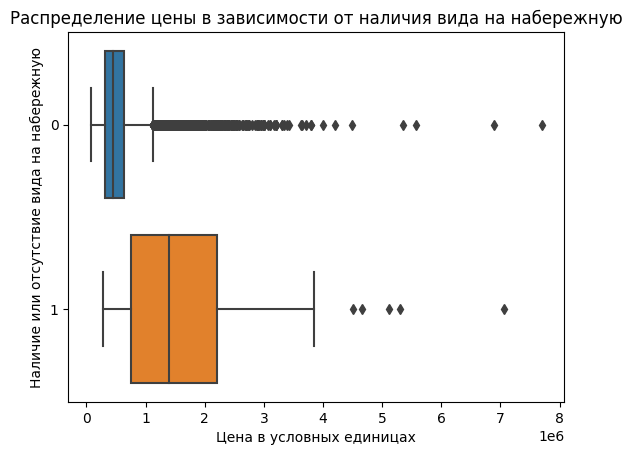

In [24]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'));
plt.xlabel('Цена в условных единицах')
plt.ylabel('Наличие или отсутствие вида на набережную')
plt.title('Распределение цены в зависимости от наличия вида на набережную');

#### Как видим, наличие вида на набережную радикально влияет на цену объекта, хотя и среди объектов, расположенных вдали от береговой линии, есть дорогие дома, все же средняя цена, а также 1 и 3 квартили распределения цен на жилье у берега намного более высокие ####

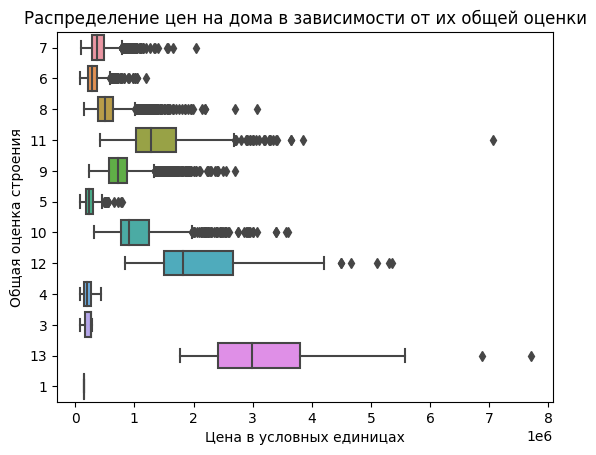

In [25]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'));
plt.xlabel('Цена в условных единицах')
plt.ylabel('Общая оценка строения')
plt.title('Распределение цен на дома в зависимости от их общей оценки');

#### Видим, что общая оценка строения прямо влияет на стоимость недвижимости, чего и следовало ожидать ####

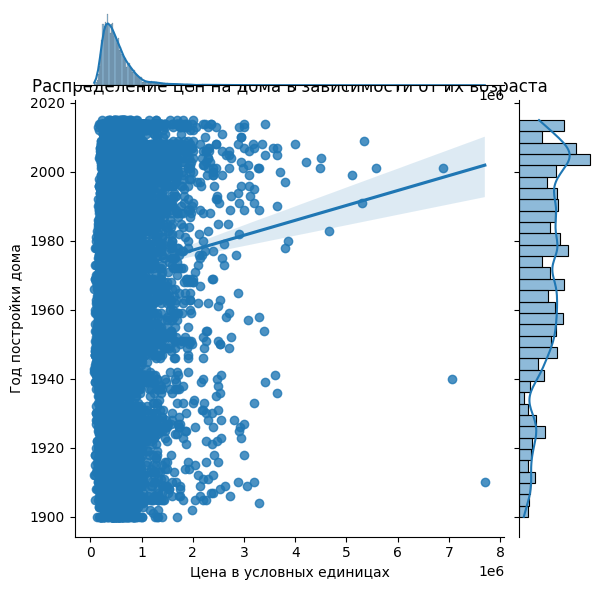

In [28]:
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');
plt.xlabel('Цена в условных единицах')
plt.ylabel('Год постройки дома')
plt.title('Распределение цен на дома в зависимости от их возраста');

#### Видим, что возраст дома оказывает незначительное влияние на цену, но также имеем в виду, что график не учитывает год реновации каждого дома и множество других параметров ####